In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Нам задали довольно жесткие ограничения на параметр $\theta$. Всвязи с этим возмем конкретное апостриорное распределение. Матожидание \theta примем нулевым всилу симметричности относительно нуля области, в которой лежит \theta. Будем использовать $N(0, \sigma^2)$, где $\sigma^2$ можно определить из соотношения $P(|\theta|<0.5) = 0.95$.

$P(|\theta|<0.5) = \int_{-\frac{1}{2}}^{\frac{1}{2}}p_\theta(x)dx = \int_{-\frac{1}{2}}^{\frac{1}{2}}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}dx = 0.95$, откуда $\sigma^2 = \frac{1}{16}$

Итак, используем апостриорное рапределение $N(0, \frac{1}{16})$

In [2]:
N, mu, sigma = 1000, 0, 1
prioriMu, prioriSigma = 0, 1/4

In [3]:
class Evaluation:
    def __init__(self, data, name, real):
        self.name = name
        self.data = np.array(data)
        self.real = real

    def plot(self, maxY):
        axis.plot(np.abs(self.data - self.real), label=r"{}".format(self.name))
        axis.legend(loc="upper left")
        axis.set_xlabel("n")
        axis.set_ylabel(r"Evaluations")
        axis.set_ylim(0, maxY)
        axis.set_title(r"Evaluations")

def evaluate(values):
    evaluations = []

    evaluations.append(Evaluation([values[:n + 1].mean() for n in range(N)], "MMP", mu))
    evaluations.append(Evaluation(
        [(prioriMu + prioriSigma * np.sum(values[:n + 1])) / (1 + n * prioriSigma) for n in range(N)],
        "Priori $N({}, {})$".format(prioriMu, prioriSigma ** 2),
        mu
    ))
    
    return evaluations

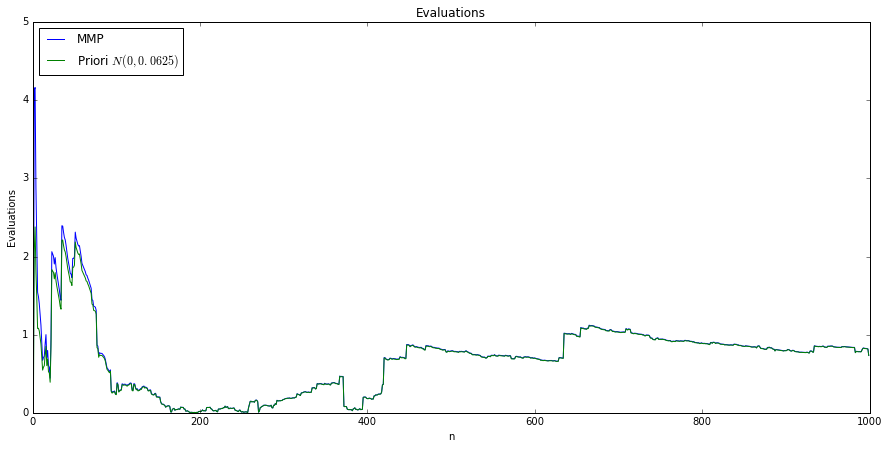

In [4]:
# Генерируем выборку, считаем оценки

values = np.random.standard_cauchy(N)
evaluations = evaluate(values)

# Строим графики абсолютных величин отклонения от реального значения
figure = plt.figure(figsize=(15,7))
axis = figure.add_subplot(1, 1, 1)
for evaluation in evaluations:
    evaluation.plot( 5)

Хм, что-то как-то не очень оценилось. Упс, мы использовали оценку для параметра нормального распределения, а выборку взяли из Коши. Проверим, лучше ли вышло бы, если бы мы взяли нормальное распределение выборки?

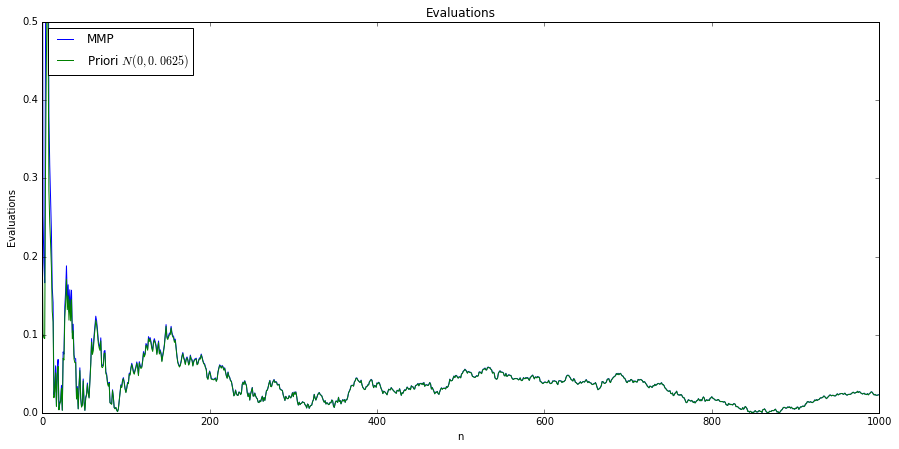

In [5]:
normalValues = np.random.normal(mu, sigma, N)
normalEvaluations = evaluate(normalValues)

# Строим графики абсолютных величин отклонения от реального значения

figure = plt.figure(figsize=(15,7))
axis = figure.add_subplot(1, 1, 1)
for evaluation in normalEvaluations:
    evaluation.plot(0.5)

Действительно намного лучше, что и ожидалось. Мораль ясна была и до эксперемента. Параметрическую модель надо выбирать правильно. Насчет байессовской статистики. Она практически совпадает с оценкой максимального правдоподобия. Даже то, что мы выбрали достаточно подходящее для $\theta$ априорное распределение, не помогло ей стать лучше оценки более стандартной не байессовской статистики.